# mehrschichtiges Neuronales Netz in Tensorflow & Keras
https://keras.io/
![Image](./Bilder/mnist2.png)

In [65]:
# solving mnist with tensorflow keras and a dense layer

# Erforderliche Bibliotheken importieren

In [47]:
# import all the required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# importieren der gesamten MNIST Datenbank

In [48]:
# load the data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Ausgabe der Trainings- bzw. Testbilder

### Ausgabe der Shape (Form)

In [49]:
# output the shape of the data (also was is drinnen in den datensätzen)
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


### Ausgabe der Dimension des Arrays (Bilder) mit `.nidm`

In [50]:
# output the dimension of the data
print(train_images.ndim)
print(test_images.ndim)

3
3


## NN erstellen

generell benötigen wir hierfür:

1. `Layer`

2. `Eingabedaten` 

3. `Verlustfunktion`

4. `Optimierer`
![Image](./Bilder/nn.png)


# Trainings- bzw. Testdaten vorbereiten, bzw. skalieren:
von [0-255] in einen Interval von [0, 1] 

In [52]:
# normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [53]:
# reshape the data
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

# Binärtransformation der einzelnen jeweiligen Label
Kodieren der Klassen (Ziffern) von 0 bis 9 - mit One-Hot-Kodierung

In [54]:
# do a one hot encoding of the labels
print("Original Label des ersten Samples\n{}".format(train_labels[0]), "\n")
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
print("One Hot Label des ersten Samples\n{}".format(train_labels[0]))

Original Label des ersten Samples
5 

One Hot Label des ersten Samples
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Definieren der Layer + Aktivierungsfunktionen
### mit dem Modul `models` bestimmen wir im folgenden einen linearen Stapel von Schichten `(Sequential)`
### Mit dem Argument `layers` definieren wir eine Liste von Layern, die dem Modell hinzugefügt werden sollen und legen die jewewiligen Attribute fest.

##### 1. der hidden layer:

In [55]:
# create a sequential model with a dense hidden layer with 512 neurons
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu)
])

+ `Dense` definiert einen layer in dem jeder Knoten mit jedem Knoten in der nachfolgenden verborgenen Schicht verbunden ist: `fully-connected Layer`
+ `input_shape` = Input layer mit 784 Eingabewerten, in unserem Falle also ein 2-D-Tensor mit 28*28 Werten
+ `activation` = Relu-Aktivierungs-Funktion
+ `512` = definiert die größe des hidden layers

---
##### 2. der output layer 

In [56]:
# create a dense layer with 10 neurons and softmax activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

+ `10` (fully-connected) Knoten


+ auf die die `softmax` funktion angewandt wird:

---
---

In [57]:
# make a summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Kompilieren des Modells
##### zum trainieren des Netzes benötigen wir noch weitere 3 Parameter :
+ `loss` Verlustfunktion E = S-K https://keras.io/losses/ https://keras.io/backend/#categorical_crossentropy
+ `optimizer` Gewichtsanpassung https://keras.io/optimizers/ https://keras.io/optimizers/#rmsprop
+ `metrics`, definiert den Anteil der Bilder, die korrekt klassifiziert wurden https://keras.io/metrics/

In [58]:
# compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# Netz trainieren
+ `fit()` übergibt dem Modell (NN) dee Numpy-Arrays der Eingabedaten `train_images` + Zielwerte `train_labels` 
+ `epochs` wie oft wir den gesamten Trainingssatz  durchlaufen möchten 
+ `batch_size`, Stapelgröße - wie viele Samples wir für eine Aktualisierung der Modellgewichte verwenden. 

In [59]:
# train the model and keep track of the loss and accuracy
history = model.fit(
    train_images, train_labels, 
    epochs=5, 
    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1998 - accuracy: 0.9405 - val_loss: 0.1227 - val_accuracy: 0.9595
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0809 - accuracy: 0.9755 - val_loss: 0.0767 - val_accuracy: 0.9751
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0524 - accuracy: 0.9836 - val_loss: 0.0777 - val_accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0375 - accuracy: 0.9883 - val_loss: 0.0617 - val_accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0271 - accuracy: 0.9912 - val_loss: 0.0769 - val_accuracy: 0.9786


Anzeige:
+ `loss` Verlustfunktion
+ `acc` accuracy, Genauigkeit der Trainningsdaten, Korrektklassifizierungsrate

# Validierung durch Visualisierung des Trainingsdurchlaufs

#### Trainings- und Validierungsverlustrate (loss)

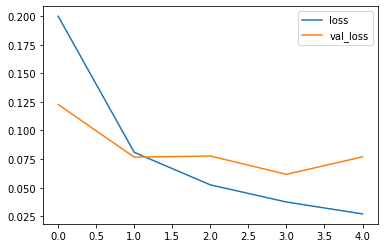

Abnahme des Fehlers über die Epochen


In [60]:
# render the loss and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
print("Abnahme des Fehlers über die Epochen")

#### Trainings- und Validierungsgenauigkeit (acc)

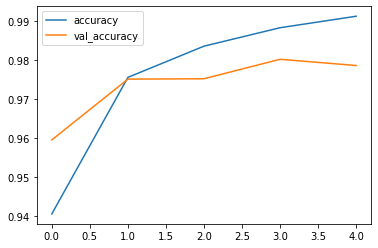

Anstieg der Genauigkeit über die Epochen


In [61]:
# render the accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
print("Anstieg der Genauigkeit über die Epochen")

# Evaluierung

313/313 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9786
Evaluation zeigt  0.978600025177002  Genauigkeit an unserem Test-Set 



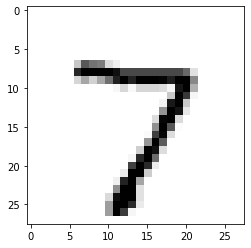

[4.7404310e-11 1.3611159e-10 2.2900058e-06 1.2389332e-06 2.2659726e-13
 1.9442692e-09 4.2052353e-13 9.9999654e-01 1.3319037e-09 1.5626286e-08]


In [63]:
# evaluate the model using the test data and print the accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Evaluation zeigt ", test_acc, " Genauigkeit an unserem Test-Set", "\n")

# show the first image in the test data
plt.imshow(test_images[0].reshape(28, 28), cmap='Greys')
plt.show()

# plott the first image in the test data with the predicted label
predictions = model.predict(test_images)
print(predictions[0])